In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from imutils import face_utils
import dlib

# New Section

In [36]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

In [37]:
def stitch(image1, image2):
    '''
    Creates panorama image of two inputs.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = None
    
    #Write your code here

    images=[]
    images.append(image1)
    images.append(image2)
    stitcher = cv2.Stitcher_create()
    (status, out_img) = stitcher.stitch(images)
    
    return out_img

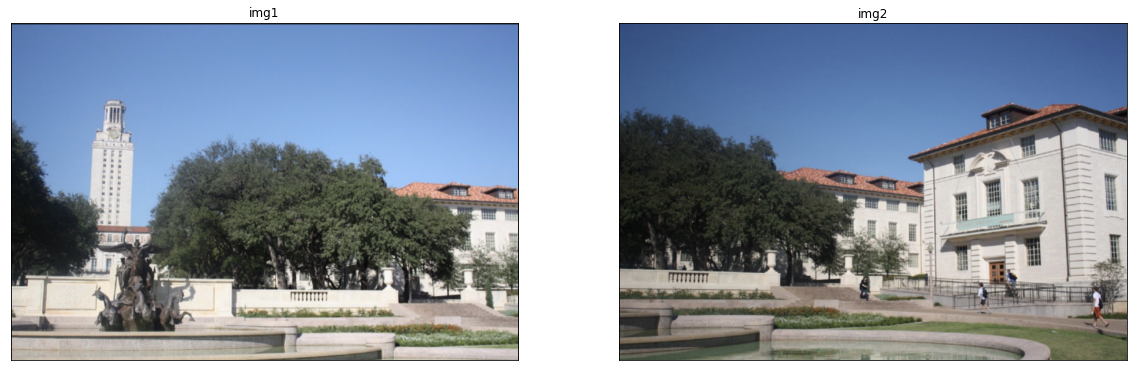

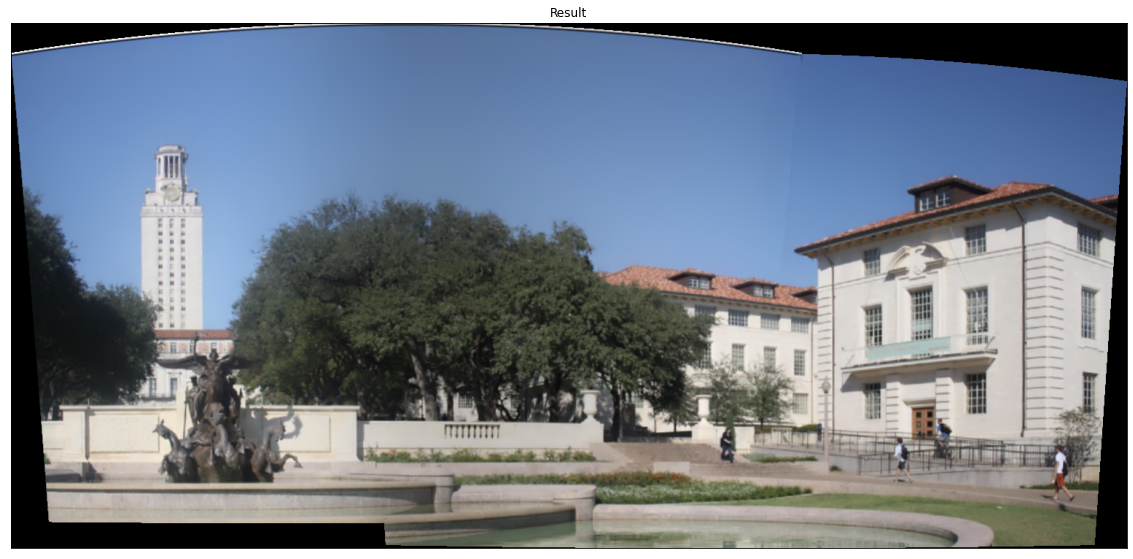

In [38]:
image_list = []

image1 = cv2.imread(os.path.join('images', '//content//sample_data//2a.png'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image_list.append([image1, 'img1', 'img'])

image2 = cv2.imread(os.path.join('images', '//content//sample_data//2b.png'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image_list.append([image2, 'img2', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '2_1')

image_list = []
image_list.append([stitch(image1,image2), 'Result', 'img'])

plotter(image_list, 1, 1, True, 20, 10, '2_2')

# New Section

In [39]:
!gdown --id '1ExaRSJP2pzY06zUaoNBQCRRFOPywKqRU'

Downloading...
From: https://drive.google.com/uc?id=1ExaRSJP2pzY06zUaoNBQCRRFOPywKqRU
To: /content/shape_predictor_68_face_landmarks.dat
99.7MB [00:00, 193MB/s] 


In [40]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = face.copy()
    
    #Write your code here
    detector = dlib.get_frontal_face_detector() 
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 
    images = imutils.resize(face, width = 700) 
    gray = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY) 
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects): 
      shape = predictor(gray, rect) 
      shape = face_utils.shape_to_np(shape) 
      (x, y, w, h) = face_utils.rect_to_bb(rect)  
  

    pts1 =np.float32([shape[3],shape[28],shape[13],shape[8]])
    pts2 =np.float32([[215,363],[613,106],[1013,355],[607,699]])

    M = cv2.getPerspectiveTransform(pts2,pts1)
    dst = cv2.warpPerspective(mask,M,(700,700))


    for i in range(face.shape[0]):
      for j in range(face.shape[1]):
        for k in range(face.shape[2]):
          if dst[i,j,k]>0:
             result[i,j,k]=dst[i,j,k]

    
    return result



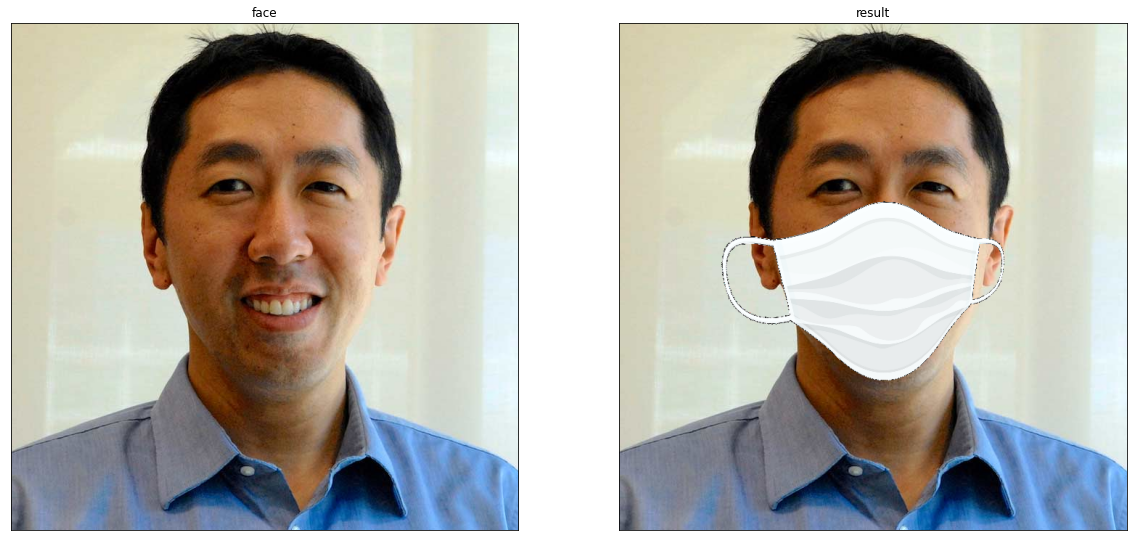

In [41]:
image_list = []

face = cv2.imread(os.path.join('images', '//content//sample_data//face.jpg'))
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])

mask = cv2.imread(os.path.join('images', '//content//sample_data//mask.jpg'))
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)



image_list.append([put_mask(face, mask), 'result', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3')